# BUPA: Liver Disorders Data Set Analysis

<pre>
Data Set Characteristics: Multivariate
Number of Instances: 345
Area: Life
Attribute Characteristics: Categorical, Integer, Real
Number of Attributes: 7
Date Donated: 1990-05-15
Associated Tasks: N/A
Missing Values? No
</pre>

## Misinterpretation of BUPA Dataset

As stated, in the Liver data set, x6 is a dependent variable indicating number of drinks, while x7 is a selector, intended to split the data into train and test subsets for one particular experiment. However, many papers interpret x6 as an independent variable, and x7 as the target for classification. In some cases it is explicitly claimed that x7 represents the presence or absence of a liver disorder. This is incorrect. In fact, the information in this data set which pertains to diagnosis is in the first five variables x1 to x5, which are the results of blood tests a physician might use to inform diagnosis. There is no ground truth in the data set relating to presence or absence of a disorder. Papers which blindly use x7 as a binary target are not doing what the researchers intend.

REFERENCE: https://www.richardsandesforsyth.net/pubs/JMRF_DiagnosingDisorder_PRL2016.pdf

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
# We'll also import seaborn, a Python graphing library
import seaborn as sns
import matplotlib.pyplot as plt
# Attribute information: /
#   1. mcv	mean corpuscular volume /
#   2. alkphos	alkaline phosphotase /
#   3. sgpt	alamine aminotransferase /
#   4. sgot 	aspartate aminotransferase /
#   5. gammagt	gamma-glutamyl transpeptidase /
#   6. drinks	number of half-pint equivalents of alcoholic beverages /
#                drunk per day /
#   7. selector	field used to split data into two sets /

# The first 5 variables are all blood tests which are thought to be /
#sensitive to liver disorders that might arise from excessive alcohol /
#consumption. Each line in the bupa.data file constitutes the record /
#of a single male individual.

# It appears that drinks>5 is some sort of a selector on this database. /
#See the PC/BEAGLE User's Guide for more information.

#NOTE:
#The final variable in the dataset is a train/test indicator, not a /
#classification label.
#A large majority of surveyed papers misinterpret the final column, /
#with meaningless results.
names = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']
# Next, we'll load the BUPA Liver Disorder Dataset, which is in /
#the current directory
bupa = pd.read_csv("bupa.data", names=names)
# Let's see what's in the BUPA Liver Disorder Dataset.
#Jupyter notebooks print the result of the last thing you do.
#Let's edit the Class lable field
bupa.loc[bupa['drinks'] > 5.0, 'drinks'] = 'Alcoholic'
bupa.loc[bupa['drinks'] <= 5.0, 'drinks'] = 'Non Alcoholic'
bupa.head(10)
# Press shift+enter to execute this cell.
#Jupyter notebooks print the result of the last thing you do.

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,Non Alcoholic,1
1,85,64,59,32,23,Non Alcoholic,2
2,86,54,33,16,54,Non Alcoholic,2
3,91,78,34,24,36,Non Alcoholic,2
4,87,70,12,28,10,Non Alcoholic,2
5,98,55,13,17,17,Non Alcoholic,2
6,88,62,20,17,9,Non Alcoholic,1
7,88,67,21,11,11,Non Alcoholic,1
8,92,54,22,20,7,Non Alcoholic,1
9,90,60,25,19,5,Non Alcoholic,1


In [2]:
# Understanding the data by visuallizing various factors.
bupa.describe()

,mcv,alkphos,sgpt,sgot,gammagt,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,2.000000


In [3]:
# (Q) how many data-points and featrues are there?
print (bupa.shape)

(345, 7)


In [4]:
#(Q) What are the column names in our dataset?
print (bupa.columns)

Index([u'mcv', u'alkphos', u'sgpt', u'sgot', u'gammagt', u'drinks',
       u'selector'],
      dtype='object')


In [5]:
# Let's see how many examples we have based on drinks.
bupa["drinks"].value_counts()

Non Alcoholic    257
Alcoholic         88
Name: drinks, dtype: int64

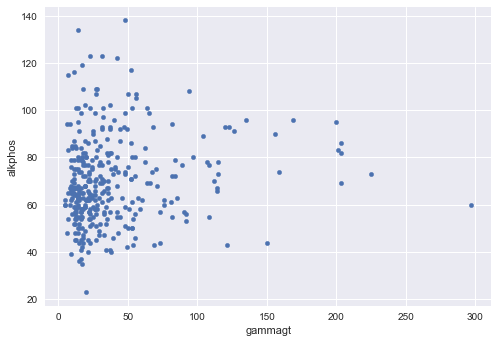

In [6]:
# We'll use .plot extension to make a scatterplot of the BUPA features.
bupa.plot(kind='scatter', x='gammagt', y='alkphos') ;
plt.show()

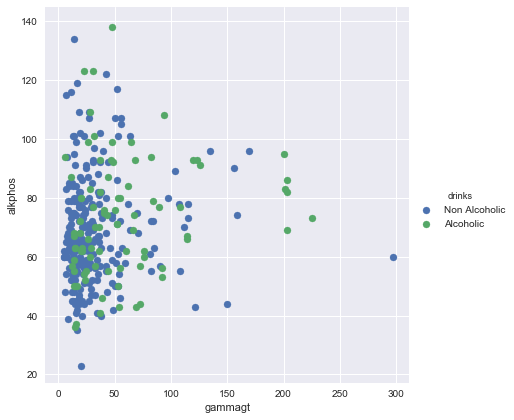

In [7]:
# One piece of information missing in the plots above is if the /
#patient was alcoholic or not.
# We'll use seaborn's FacetGrid to color the scatterplot by number /
#of drinks.

sns.FacetGrid(bupa, hue="drinks", size=6) \
   .map(plt.scatter, "gammagt", "alkphos") \
   .add_legend()
plt.show()

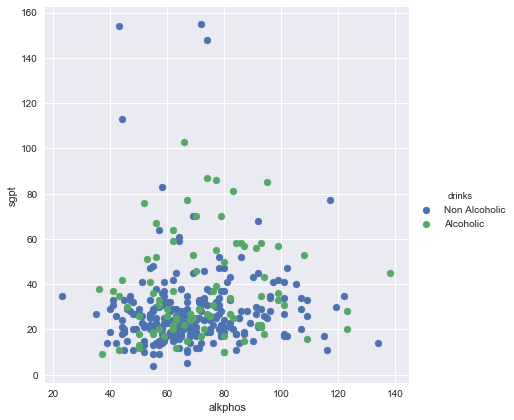

In [8]:
#Lets examin some other features based on the number of drinks /
#a patient had.

sns.FacetGrid(bupa, hue="drinks", size=6) \
   .map(plt.scatter, "alkphos", "sgpt") \
   .add_legend()
plt.show()

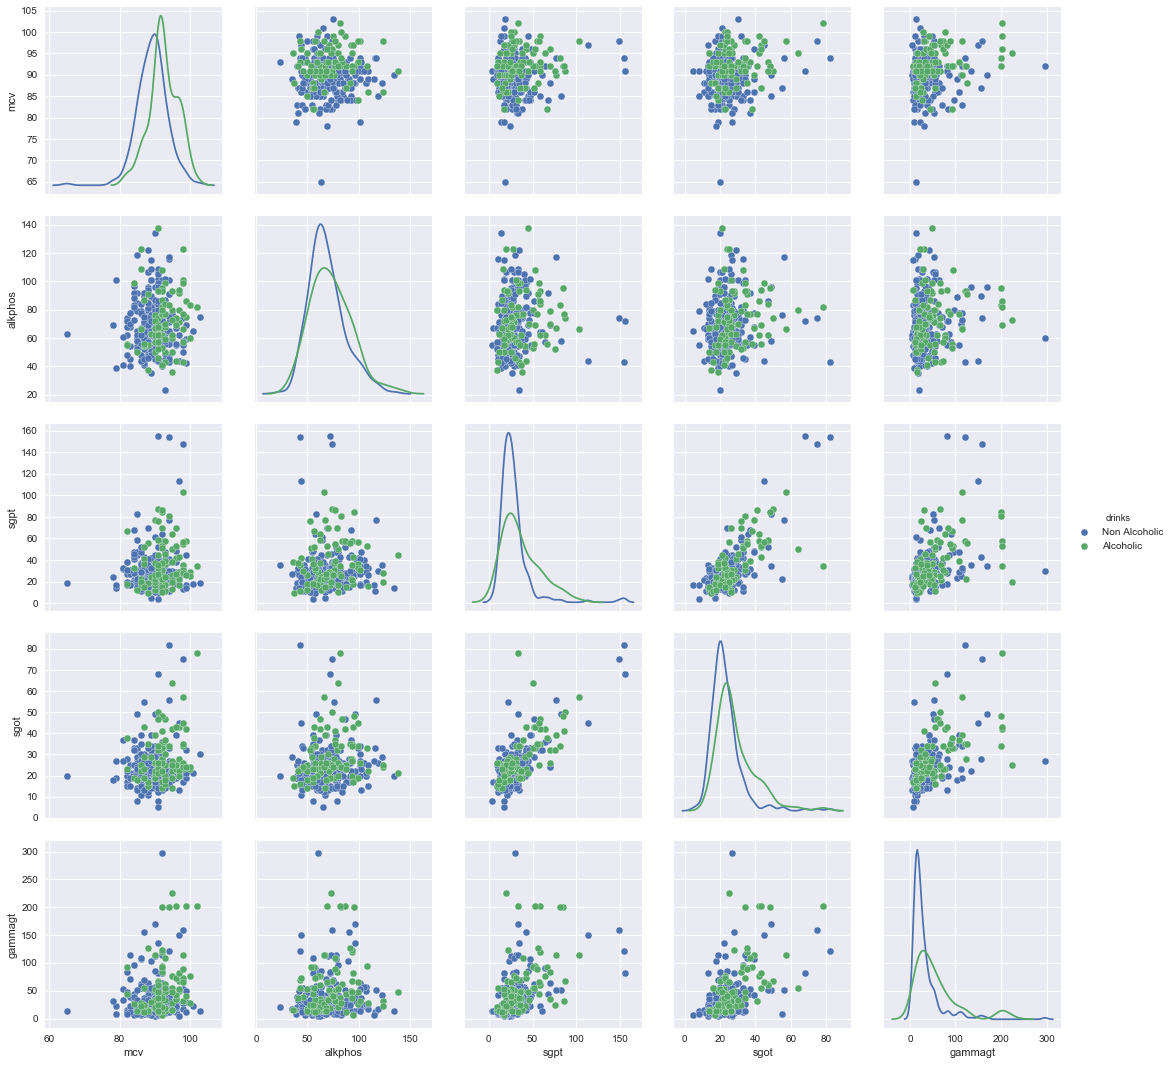

In [9]:
# Let's now analyse bivariate relation between each pair of features.
sns.pairplot(bupa.drop("selector", axis=1), hue="drinks", size=3, diag_kind="kde")
plt.show()

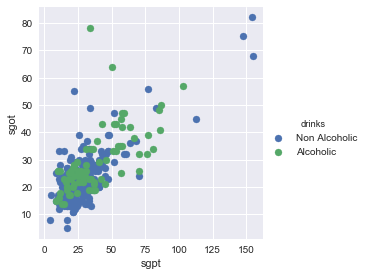

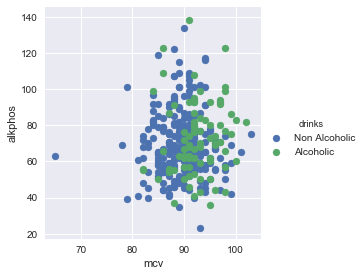

In [10]:
#From above pair plot we could conclude 2 things.
# 1. sgot & sgpt are showing positive correlation.
sns.FacetGrid(bupa, hue="drinks", size=4) \
   .map(plt.scatter, "sgpt", "sgot") \
   .add_legend()
# 2. mcv & alkphos might be used to classify an Alcoholic. /
#but it is not distinguishing them clearly.
sns.FacetGrid(bupa, hue="drinks", size=4) \
   .map(plt.scatter, "mcv", "alkphos") \
   .add_legend()
plt.show()

## Finding the most Correlated Features

In [11]:
#Lets now check the covariance dataframe.
bupa.cov()

,mcv,alkphos,sgpt,sgot,gammagt,selector
mcv,19.785558,3.599343,12.818841,8.405839,38.817956,-0.200244
alkphos,3.599343,336.637007,27.282735,26.970804,95.891810,-0.889282
sgpt,12.818841,27.282735,380.730199,145.258468,385.605325,-0.337673
sgot,8.405839,26.970804,145.258468,101.294034,208.453311,0.782861
gammagt,38.817956,95.891810,385.605325,208.453311,1540.924890,2.840664
selector,-0.200244,-0.889282,-0.337673,0.782861,2.840664,0.244355


In [12]:
#Lets now check the correlation dataframe.
bupa.corr()

,mcv,alkphos,sgpt,sgot,gammagt,selector
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,-0.091070
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,-0.098050
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,-0.035009
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.157356
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.146393
selector,-0.091070,-0.098050,-0.035009,0.157356,0.146393,1.000000


## Hypothesis Test for the Population Correlation Coefficient

<pre>
Reference: https://onlinecourses.science.psu.edu/stat501/node/259
Reference: https://www.greycampus.com/opencampus/lean-six-sigma-black-belt/hypothesis-testing
Reference: https://docs.scipy.org/doc/scipy-0.19.1/reference/tutorial/stats.html
Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC374386/
</pre>

 # Conclusion

Here we can see that only SGOT & SGPT are having the maximum positive correlation.

Moreover the Number of Drinks is not the right class to classify liver disorder.